#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

# 1_Basic Data Exploration :

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Load your dataset
df = pd.read_csv('C:\\Users\\mayar\\Desktop\\Salaries.csv')

In [239]:

NumberRows, NumberColumns  = df.shape
print(f"Number of Rows: {NumberRows}")
print(f"Number of Columns: {NumberColumns}")

print("\nData Types of Each Column:")
print(df.dtypes)

print("\nMissing Values in Each Column:")
print(df.isna().sum())

Number of Rows: 148654
Number of Columns: 13

Data Types of Each Column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2_Descriptive Statistics :

#### In the beginning, we took all values greater than zero because they would affect the results, such as negative or zero values resulting from possible errors in the data, and then we extract what is required.

In [240]:
dfCleaned = df[df['TotalPay'] > 0]
print(df['TotalPay'].shape)
print(dfCleaned['TotalPay'].shape)

mean_salary = dfCleaned['TotalPay'].mean()
median_salary = dfCleaned['TotalPay'].median()
mode_salary = dfCleaned['TotalPay'].mode()[0]
min_salary = dfCleaned['TotalPay'].min()
max_salary = dfCleaned['TotalPay'].max()
range_salary = max_salary - min_salary
std_dev_salary = dfCleaned['TotalPay'].std()

# Display the results
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Range of Salaries: {range_salary}")
print(f"Standard Deviation of Salaries: {std_dev_salary}")

(148654,)
(148285,)
Mean Salary: 74954.38346771419
Median Salary: 71553.0
Mode Salary: 18594.0
Minimum Salary: 0.3
Maximum Salary: 567595.43
Range of Salaries: 567595.13
Standard Deviation of Salaries: 50441.766218846395


# 3_Data Cleaning :
#### first we remove Notes and Status because its empty in all rows 

In [241]:
#drop Notes and Status Because they are empty values  and they dont help in anything 
dfCleaned.drop('Notes' , axis = 1 , inplace = True)
dfCleaned.drop('Status' , axis = 1 , inplace = True)
print(dfCleaned.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object


C:\Users\mayar\AppData\Local\Temp\ipykernel_8044\100800790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned.drop('Notes' , axis = 1 , inplace = True)
C:\Users\mayar\AppData\Local\Temp\ipykernel_8044\100800790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned.drop('Status' , axis = 1 , inplace = True)


### for BasePay null value :
#### I replaced the missing values with the average basic salary
#### because it would not affect the values in this way 
#### The deviation will not increase to prevailing values such as zero
### for Benefits null value :
#### We removed the missing lines from the interest section
#### because they may be important and accurate information that we need to have precisely

In [242]:

meanBasePay = dfCleaned['BasePay'].mean()
dfCleaned['BasePay'].fillna(meanBasePay, inplace=True)

dfCleaned = dfCleaned.dropna(subset=['Benefits'])

print("\nData Types of Each Column:")
print(dfCleaned.dtypes)

print("\nMissing Values in Each Column:")
print(dfCleaned.isna().sum())


Data Types of Each Column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object

Missing Values in Each Column:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


C:\Users\mayar\AppData\Local\Temp\ipykernel_8044\1694732952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['BasePay'].fillna(meanBasePay, inplace=True)


# 4_Basic Data Visualization :
### Create histograms or bar charts to visualize the distribution of salaries :

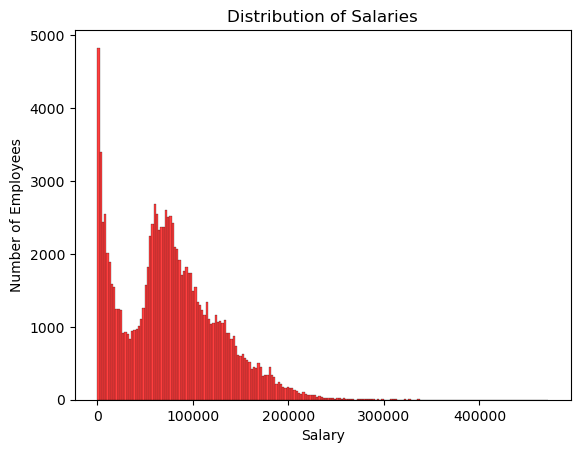

In [243]:

sns.histplot(dfCleaned['TotalPay'], kde=False , bins = 200 , color = 'red')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

### The data in the job title was a lot and random, so we tried to fix it and collect it 
#### we start with function thats : 
#### 1 convert all string in data to lower case 
#### 2 remove number in data like : police officer 2 & police officer 3 
#### 3 Trying to group jobs together without detailing them

In [245]:
def generalize_job_title(job_title):
    
    # Convert to lowercase
    job_title = job_title.lower()

    # Remove numerical 
    job_title = re.sub(r'\d+', '', job_title).strip()

    # Generalize job titles (add conditions as needed)
    if 'police' in job_title:
        return 'Police Officer'
    elif 'firefighter' in job_title:
        return 'Firefighter'
    elif 'deputy' in job_title:
        return 'Deputys'
    elif 'nurse' in job_title:
        return 'Nurse'
    elif ' eng' in job_title:
        return 'Engineer '
    elif 'chief' in job_title:
        return 'chief '
    elif 'supervisor' in job_title:
        return 'supervisor'
    elif 'technical' in job_title:
        return 'technical'
    elif 'fire' in job_title:
        return 'Fire department'
    elif 'sfers' in job_title:
        return 'sfers'    
    elif 'manager' in job_title:
        return 'manager'    
    elif 'assistant' in job_title:
        return 'assistants'
    elif 'trainee' in job_title:
        return 'Trainee'
    elif 'parking' in job_title:
        return 'Parking employee'
    elif 'accountant' in job_title:
        return 'Accountant'
    else:
        return job_title.capitalize()
dfCleaned['JobTitleFiltered'] = dfCleaned['JobTitle'].apply(generalize_job_title)

##### We collected similar data for the pie chart and took the top 20 categories to represent them, and the rest we put them in a new category ( other)

JobTitleFiltered
Nurse                             10138
Transit operator                   6994
Police Officer                     5676
assistants                         5044
Engineer                           3724
Deputys                            3285
Firefighter                        3270
manager                            2811
Public svc aide-public works       2516
supervisor                         2454
Custodian                          2412
Recreation leader                  1968
Trainee                            1370
Sergeant                           1178
Attorney (civil/criminal)          1125
Health worker                      1102
Porter                             1094
Parking employee                   1063
General laborer                    1022
Fire department                    1010
Gardener                            890
Senior clerk                        839
Library page                        799
Clerk                               761
Eligibility worker     

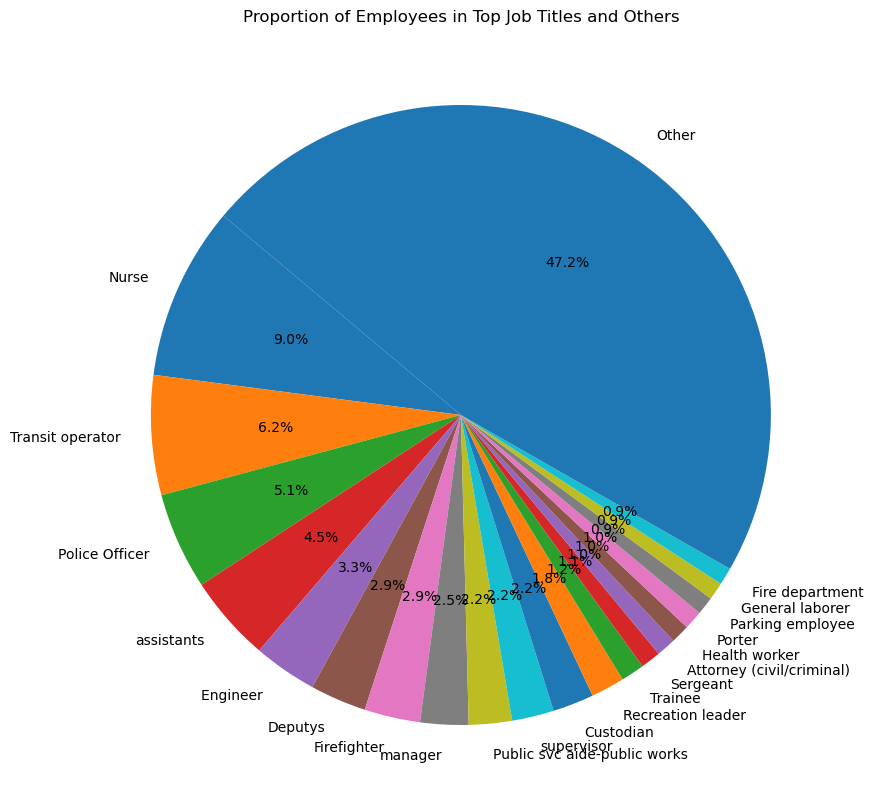

In [246]:
jobTitleCounts = dfCleaned['JobTitleFiltered'].value_counts()

print(jobTitleCounts.head(30))

topTitles = jobTitleCounts.head(20)


otherCount = jobTitleCounts[20:].sum()

# Create Series Other
otherSeries = pd.Series({'Other': otherCount})


pie_data = pd.concat([topTitles, otherSeries])

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Top Job Titles and Others')
plt.show()


# 5_Grouped Analysis :

In [247]:
# Group by the new JobTitle and calculate the mean of each group
average_salary_by_jobtitle = dfCleaned.groupby('JobTitleFiltered')['TotalPay'].mean()


print(average_salary_by_jobtitle)

# Group by Year ,  and calculate the mean of each group
average_salary_by_year = dfCleaned.groupby('Year')['TotalPay'].mean()

print(average_salary_by_year)

# Group by both
average_salary_by_year_jobtitle = dfCleaned.groupby(['Year', 'JobTitleFiltered'])['TotalPay'].mean()

print(average_salary_by_year_jobtitle)



JobTitleFiltered
Account clerk                43012.547406
Accountant                   75713.463728
Acupuncturist                76031.500000
Adm, sfgh medical center    270047.446667
Admin analyst                70017.751667
                                ...      
chief                       176197.136433
manager                     122709.317520
sfers                        46282.338087
supervisor                   94438.039201
technical                    64208.749296
Name: TotalPay, Length: 777, dtype: float64
Year
2012    74163.691800
2013    78210.405992
2014    75568.993154
Name: TotalPay, dtype: float64
Year  JobTitleFiltered        
2012  Account clerk                46066.717765
      Accountant                   72784.245761
      Acupuncturist                71748.500000
      Adm, sfgh medical center    264364.820000
      Admin analyst                40703.766667
                                      ...      
2014  chief                       180554.024679
      manag

# Simple Correlation Analysis :

Correlation between TotalPay and BasePay: 0.9547346418616115


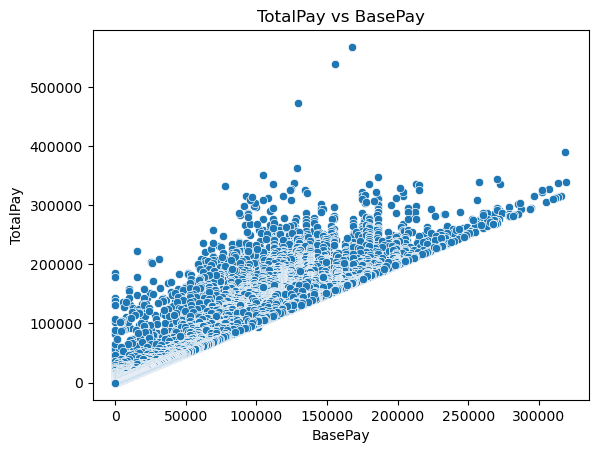

In [248]:
correlation_basePay = dfCleaned['TotalPay'].corr(df['BasePay'])
print("Correlation between TotalPay and BasePay:", correlation_basePay)

sns.scatterplot(x='BasePay', y='TotalPay', data=df)


plt.title('TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')


plt.show()

Correlation between TotalPay and BasePay: 0.8835995794358921


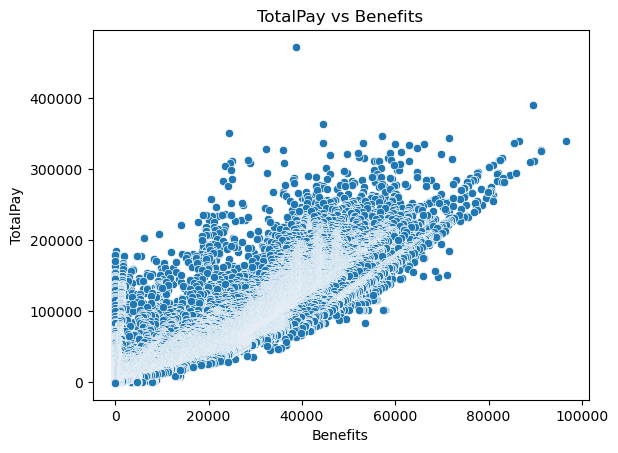

In [249]:
correlation_Benefits = dfCleaned['TotalPay'].corr(df['Benefits'])
print("Correlation between TotalPay and BasePay:", correlation_Benefits)

sns.scatterplot(x='Benefits', y='TotalPay', data=df)


plt.title('TotalPay vs Benefits')
plt.xlabel('Benefits')
plt.ylabel('TotalPay')

plt.show()

# Good Luck!